## Importing Important Library

In [1]:
import matplotlib
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
import geopy as gp
from geopy.geocoders import Nominatim
from geopy.point import Point


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.subplots as sp


## Import Dataset

In [2]:
df = pd.read_csv("makemytrip.csv", on_bad_lines='skip', encoding='latin1')
pd.set_option("display.max_columns", None) 

## Importing 1st and Last five rows

In [3]:
df

area  \
0                                      Hardasji Ki Magri   
1                                          Near Nai Gaon   
2                                  Near Bagore Ki Haveli   
3                                                  Dabok   
4                                           East Udaipur   
...                                                  ...   
20041                            Thonichal, Mananthavady   
20042                                                NaN   
20043                       Central Mysore,Nazarbad Road   
20044                                            Wayanad   
20045  Opp. APSEB Sub Station,Behind Bezwada Home Foo...   

                               city country  crawl_date  \
0                           Udaipur   India  2016-06-21   
1                           Udaipur   India  2016-06-21   
2                           Udaipur   India  2016-06-21   
3                           Udaipur   India  2016-06-21   
4                           Udaipur   India  2016-06-21   
...                             ...     ...         ...   
20041                       Wayanad   India         NaN   
20042                      Varanasi   India         NaN   
20043  WeekendGetawaysAroundChennai   India         NaN   
20044                       Wayanad   India         NaN   
20045                Vishakhapatnam   India         NaN   

                                         highlight_value  \
0                                           {{facility}}   
1                                           {{facility}}   
2                                           {{facility}}   
3      Airport Transfer|Car rental|Conference Hall|Cu...   
4                                           {{facility}}   
...                                                  ...   
20041  Conference Hall|Doctor on Call|Room Service|Tr...   
20042  24 Hour Doctor On Call.|Laundry Service (At a ...   
20043  Airport/Rlwy Stn Transfer|Business Centre|Conf...   
20044                                                NaN   
20045  Conference Hall|Dining Hall|Internet Facility|...   

                                          hotel_overview hotel_star_rating  \
0      |Zion Home Stay is located in a city that sets...            1 star   
1      | Araliayas Resorts is a 3 star hotel located ...            3 star   
2      |A 2 star property is located at 24 km from Ma...            2 star   
3      |SNP House Airport Hotel And Restaurant is loa...            1 star   
4      | Hotel Pichola Haveli is situated in the beau...            2 star   
...                                                  ...               ...   
20041  |Abhirami Farm Resorts is a budget property, s...            1 star   
20042  |Located in the Holy City of Varanasi, Hotel G...            1 star   
20043  |Ginger Hotel is nestled in Mysore which is ca...            3 star   
20044  Homestay is situated at Korram, in Wayanad Dis...            1 star   
20045  |4.4 km from Ramkrishna Beach, 4.2 km from Al ...            1 star   

                                              image_urls  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3      //imghtlak.mmtcdn.com/images/hotels/2014071815...   
4                                                    NaN   
...                                                  ...   
20041  //imghtlak.mmtcdn.com/images/hotels/2014121816...   
20042  //imghtlak.mmtcdn.com/images/hotels/2014102213...   
20043  //imghtlak.mmtcdn.com/images/hotels/2007011716...   
20044  http://www.tripvillas.com/media/origin/1049657...   
20045  //imghtlak.mmtcdn.com/images/hotels/2011021211...   

                                            in_your_room is_value_plus  \
0                                              {{value}}            no   
1                                              {{value}}            no   
2                    

## Checking Shape

In [4]:
print("Shape of the dataframe",df.shape)


Shape of the dataframe (20046, 33)


In [5]:
print("duplicated Value count",df.duplicated().sum())
analys = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    
    'NullPercent':df.isna().sum() / len(df),
    'Type':df.dtypes.values
    
})
display(analys)


duplicated Value count 2210


Unique   Null  NullPercent     Type
area                               6514   5324     0.265589   object
city                                756      0     0.000000   object
country                               1    458     0.022847   object
crawl_date                           25   9349     0.466377   object
highlight_value                    8127   2372     0.118328   object
hotel_overview                    11493   3354     0.167315   object
hotel_star_rating                    15      0     0.000000   object
image_urls                         6711  11446     0.570987   object
in_your_room                       5571   5350     0.266886   object
is_value_plus                         2      0     0.000000   object
latitude                           9959     21     0.001048  float64
longitude                          9932     21     0.001048  float64
mmt_holidayiq_review_count          267  10634     0.530480  float64
mmt_location_rating                  81   8503     0.424174   object
mmt_review_count                    291  10668     0.532176  float64
mmt_review_rating                  3429   8503     0.424174   object
mmt_review_score                     42  10274     0.512521  float64
mmt_traveller_type_review_count    2918   2037     0.101616   object
mmt_tripadvisor_count               648   8888     0.443380  float64
pageurl                           17836      0     0.000000   object
property_address                  15038      4     0.000200   object
property_id                       15168      0     0.000000   object
property_name                     12612      0     0.000000   object
property_type                        14    110     0.005487   object
qts                                  83  14475     0.722089   object
query_time_stamp                    190      0     0.000000   object
room_types                         4917   4881     0.243490   object
site_review_count                    46  19138     0.954704   object
site_review_rating                   35  19492     0.972364  float64
sitename                              1      0     0.000000   object
state                               270  15162     0.756360   object
traveller_rating                   4967  13266     0.661778   object
uniq_id                           17836      0     0.000000   object

In [6]:
df.columns

Index(['area', 'city', 'country', 'crawl_date', 'highlight_value',
       'hotel_overview', 'hotel_star_rating', 'image_urls', 'in_your_room',
       'is_value_plus', 'latitude', 'longitude', 'mmt_holidayiq_review_count',
       'mmt_location_rating', 'mmt_review_count', 'mmt_review_rating',
       'mmt_review_score', 'mmt_traveller_type_review_count',
       'mmt_tripadvisor_count', 'pageurl', 'property_address', 'property_id',
       'property_name', 'property_type', 'qts', 'query_time_stamp',
       'room_types', 'site_review_count', 'site_review_rating', 'sitename',
       'state', 'traveller_rating', 'uniq_id'],
      dtype='object')

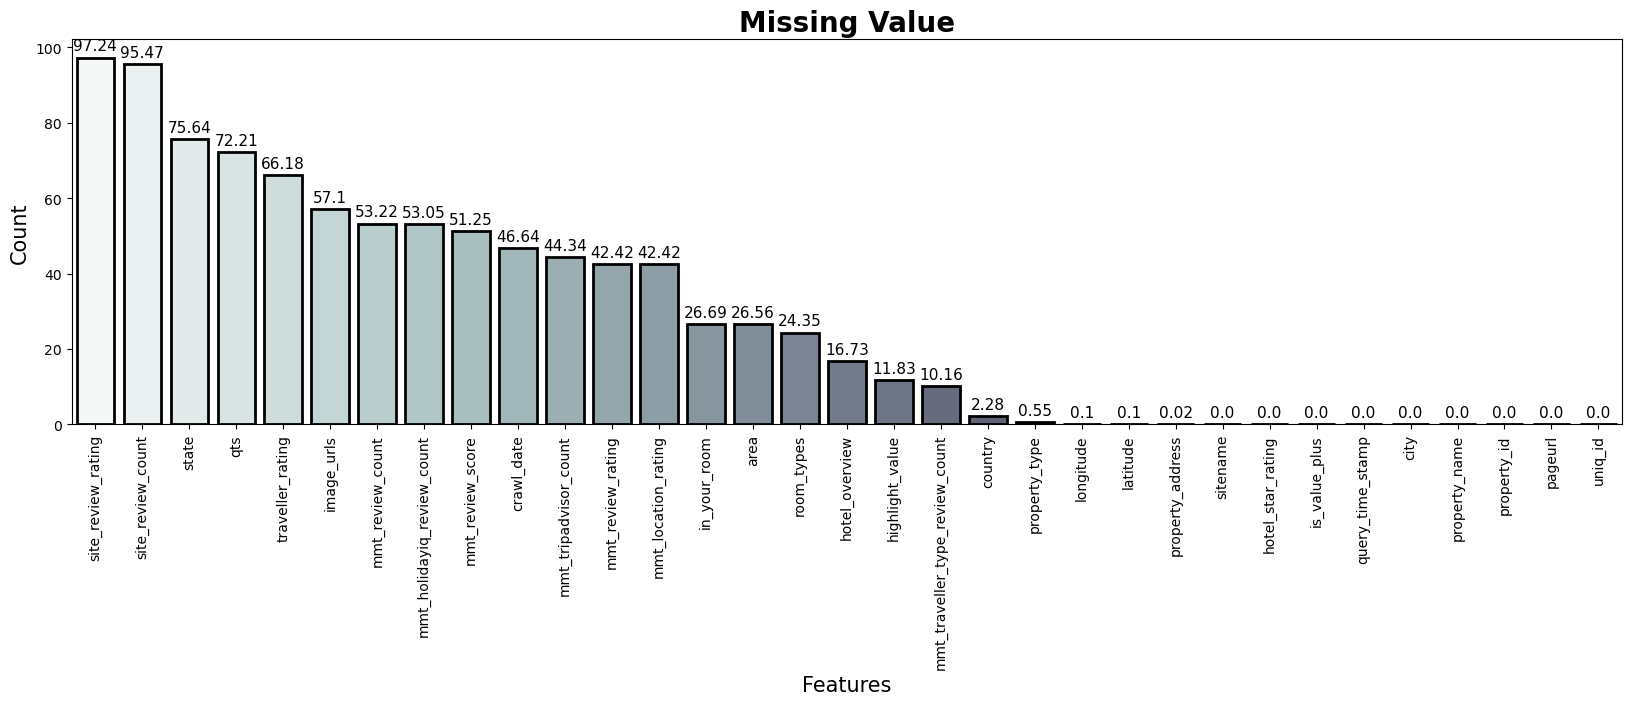

In [7]:
Value_Missing = df.isnull().sum().sort_values(ascending = False)
percent_missing = (df.isnull().sum() * 100 / len(df)).round(2).sort_values(ascending = False)
missing_data = pd.concat([Value_Missing, percent_missing], axis = 1, keys = ['Total', 'Percent'])
f, ax = plt.subplots(figsize = (20, 5))
plt.xticks(rotation=90)

#This is showing the missing data percentage of each column.
cplot = sns.barplot(x = missing_data.index, y = missing_data['Percent'], palette = 'bone_r', lw = 2, ec = 'black')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 11, xytext = (0,3), textcoords = 'offset points')
cplot.set_title('Missing Value', fontsize = 20, weight = 'bold')
cplot.set_ylabel('Count', fontsize = 15)
cplot.set_xlabel('Features', fontsize = 15);

In [8]:
missing_data.index

Index(['site_review_rating', 'site_review_count', 'state', 'qts',
       'traveller_rating', 'image_urls', 'mmt_review_count',
       'mmt_holidayiq_review_count', 'mmt_review_score', 'crawl_date',
       'mmt_tripadvisor_count', 'mmt_review_rating', 'mmt_location_rating',
       'in_your_room', 'area', 'room_types', 'hotel_overview',
       'highlight_value', 'mmt_traveller_type_review_count', 'country',
       'property_type', 'longitude', 'latitude', 'property_address',
       'sitename', 'hotel_star_rating', 'is_value_plus', 'query_time_stamp',
       'city', 'property_name', 'property_id', 'pageurl', 'uniq_id'],
      dtype='object')

In [9]:
df.drop(['in_your_room', 'is_value_plus',"pageurl","query_time_stamp","image_urls","qts","site_review_count"], axis=1, inplace=True)

In [10]:
df.drop(['crawl_date', 'highlight_value',"hotel_overview","mmt_holidayiq_review_count",'sitename', 'state',"mmt_review_rating"], axis=1, inplace=True)

In [11]:
"""counting the occurrences of each unique value in the "traveller_rating" column
and then sorting those counts in ascending order based on the unique traveller ratings.
The result is a Series where the index represents unique traveller ratings, and the values represent
the corresponding counts of each rating in the DataFrame.
"""
df["traveller_rating"].value_counts().sort_values()

traveller_rating
Location:4.6/5 | Hospitality:4.6/5 | Facilities:4.6/5 | Cleanliness:4.6/5 | Value for Money:4.6/5 | Food:3.3/5      1
Location:4.5/5 | Hospitality:4.2/5 | Facilities:3.9/5 | Cleanliness:4.4/5 | Value for Money:4.2/5 | Food:4.3/5      1
Location:4.3/5 | Hospitality:3.5/5 | Facilities:3.3/5 | Cleanliness:2.9/5 | Value for Money:3.5/5 | Food:2.3/5      1
Location:4.4/5 | Hospitality:3.6/5 | Facilities:3.6/5 | Cleanliness:2.4/5 | Value for Money:3.6/5 | Food:1.8/5      1
Location:4.7/5 | Hospitality:4.5/5 | Facilities:4/5 | Cleanliness:3.6/5 | Value for Money:4.3/5 | Food:3.7/5        1
                                                                                                                 ... 
3.5                                                                                                                29
4.0                                                                                                                33
Location:5.0/5 | Hospitality:5.0/5 | Fa

In [12]:
df.hotel_star_rating.value_counts()

hotel_star_rating
1 star        8292
1             3102
3 star        2977
2 star        1928
3             1231
2              884
4 star         752
5 star         340
4              321
5              155
0               43
Three on 5       9
Four on 5        7
Five on 5        3
Four star        2
Name: count, dtype: int64

In [13]:
df['hotel_star_rating']=df['hotel_star_rating'].replace('1 star',1).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('2 star',2).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('3 star',3).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('4 star',4).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('5 star',5).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('Four star',4).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('Three on 5',3).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('Four on 5',4).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('Five on 5',5).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].fillna(0).astype(str)

In [14]:
df['hotel_star_rating'].dtype

dtype('O')

In [15]:
df.hotel_star_rating.value_counts()

hotel_star_rating
1    11394
3     4217
2     2812
4     1082
5      498
0       43
Name: count, dtype: int64

In [16]:
df['site_review_rating']=df['site_review_rating'].fillna(0).astype(str)


In [17]:
df.site_review_rating.value_counts()

site_review_rating
0.0    19513
4.2       40
4.3       36
4.1       34
3.8       34
4.0       31
4.6       31
4.4       30
3.7       29
3.4       28
3.5       25
4.5       24
3.6       21
3.9       19
4.8       17
5.0       17
3.2       16
3.0       14
3.3       14
2.8       11
4.7       11
2.3        7
4.9        6
2.9        6
3.1        5
1.8        5
2.6        4
1.9        4
2.0        3
2.4        3
2.1        2
2.7        2
2.5        2
1.0        1
2.2        1
Name: count, dtype: int64

In [18]:
df["traveller_rating"]=df.traveller_rating.fillna(0)

In [19]:
df.head(-5)

area                       city country  \
0          Hardasji Ki Magri                    Udaipur   India   
1              Near Nai Gaon                    Udaipur   India   
2      Near Bagore Ki Haveli                    Udaipur   India   
3                      Dabok                    Udaipur   India   
4               East Udaipur                    Udaipur   India   
...                      ...                        ...     ...   
20036                    NaN             Vishakhapatnam   India   
20037        Muttil, Wayanad                    Wayanad   India   
20038               varanasi                   Varanasi   India   
20039           Bedford Road                    Yercaud   India   
20040            Manmad Road  WeekendGetawaysAroundPune   India   

      hotel_star_rating   latitude  longitude mmt_location_rating  \
0                     1  24.581788  73.667805                  ..   
1                     3  24.544342  73.644242                  ..   
2                     2  24.579942  73.681953                  ..   
3                     1  24.622607  73.855194                 NaN   
4                     2  24.580100  73.682200                  ..   
...                 ...        ...        ...                 ...   
20036                 1  17.732237  83.318084                 NaN   
20037                 1  11.662949  76.110786                   5   
20038                 1   0.000000   0.000000                 NaN   
20039                 1  11.781300  78.217700                 NaN   
20040                 3  19.748200  74.478100                 4.6   

       mmt_review_count  mmt_review_score  \
0                   NaN               4.5   
1                   NaN               4.5   
2                   NaN               NaN   
3                   NaN               NaN   
4                   NaN               3.7   
...                 ...               ...   
20036               NaN               4.5   
20037               2.0               4.9   
20038               NaN               NaN   
20039               NaN               NaN   
20040               5.0               4.7   

                         mmt_traveller_type_review_count  \
0      Families:{{ratingSummaryInfo.miscMap['family']...   
1      Families:{{ratingSummaryInfo.miscMap['family']...   
2      Families:{{ratingSummaryInfo.miscMap['family']...   
3            Families:|Couples:|Business:|Solo:|Friends:   
4      Families:{{ratingSummaryInfo.miscMap['family']...   
...                                                  ...   
20036        Families:|Couples:|Business:|Solo:|Friends:   
20037   Families:2|Couples:0|Business:0|Solo:0|Friends:0   
20038        Families:|Couples:|Business:|Solo:|Friends:   
20039        Families:|Couples:|Business:|Solo:|Friends:   
20040   Families:1|Couples:2|Business:0|Solo:0|Friends:0   

       mmt_tripadvisor_count  \
0                        6.0   
1                       34.0   
2                       16.0   
3                        3.0   
4                      139.0   
...                      ...   
20036                    1.0   
20037                   38.0   
20038                    NaN   
20039                    6.0   
20040                   22.0   

                                        property_address  \
0      Zion, F-17, Haridas Ji Ki Magri, Near Bal Vina...   
1                    Udaipur-Jhadol Road , Near Nai Gaon   
2      23/208 Gangaur Ghat Near Bagore Ki Haveli , Ne...   
3          Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok   
4      64 Ghangour Ghat, Opp Bagore Ki Haveli , East ...   
...                                                  ...   
20036  9-1-44, New Resapuvanipalem Near CMR Central V...   
20037         Padmabhavan, Thonduppali , Muttil, Wayanad   
20038             Vijya nagaram Market, cantt , varanasi   
20039  Plot No20, Bedford Avenue, Bedford Road,Yercau...   
20040  Near Sanskruti Resort, Nagar Manmad Road , Nea...   

                 prope

In [20]:
df["country"]=df.property_type.fillna("India")

In [21]:
df["country"]

0        Hotel
1        Hotel
2        Hotel
3        Hotel
4        Hotel
         ...  
20041    Hotel
20042    Lodge
20043    Hotel
20044    Hotel
20045    Hotel
Name: country, Length: 20046, dtype: object

In [22]:
df["area"]=df.area.fillna(df["city"])

In [23]:
df[df["country"] == "India"]

area               city country hotel_star_rating   latitude  \
286        Vythiri            Wayanad   India                 1  11.542296   
1824    Uttarkashi         Uttarkashi   India                 1   0.000000   
1876        Ujjain             Ujjain   India                 1   0.000000   
1896       Udaipur            Udaipur   India                 1   0.000000   
1898       Udaipur            Udaipur   India                 1   0.000000   
...            ...                ...     ...               ...        ...   
19860    Ghaziabad  New Delhi And NCR   India                 3  28.673620   
19884          Goa                Goa   India                 1   0.000000   
19898          Goa                Goa   India                 1   0.000000   
19931    Fatehabad          Fatehabad   India                 1  29.709365   
19958  Gandhinagar        Gandhinagar   India                 1   0.000000   

       longitude mmt_location_rating  mmt_review_count  mmt_review_score  \
286    76.040478                 NaN               NaN               NaN   
1824    0.000000                 NaN               NaN               NaN   
1876    0.000000                 NaN               NaN               NaN   
1896    0.000000                 NaN               NaN               NaN   
1898    0.000000                 NaN               NaN               NaN   
...          ...                 ...               ...               ...   
19860  77.443305                 NaN               NaN               NaN   
19884   0.000000                 NaN               NaN               NaN   
19898   0.000000                 NaN               NaN               NaN   
19931  75.893728                 NaN               NaN               NaN   
19958   0.000000                 NaN               NaN               NaN   

      mmt_traveller_type_review_count  mmt_tripadvisor_count  \
286                               NaN                    NaN   
1824                              NaN                    NaN   
1876                              NaN                    NaN   
1896                              NaN                    NaN   
1898                              NaN                    NaN   
...                               ...                    ...   
19860                             NaN                    NaN   
19884                             NaN                    NaN   
19898                             NaN                    NaN   
19931                             NaN                    NaN   
19958                             NaN                    NaN   

                                        property_address         property_id  \
286                                  Old Vythiri Wayanad  201606081021011365   
1824                                       NH 34, Maneri  201606271936369151   
1876            140/1, infront of Mahakal Parking Ujjain  201606241129236493   
1896      19 unto ka karkhana bhattiyani chohtta udaipur   20160628142903859   
1898                             Hiran Magri Hiran Magri  201606271813268455   
...                                                  ...                 ...   
19860                      B21,22 RDC Rajnagar Ghaziabad  201606011135285196   
19884  Kieran Saldanha Park, Behind Golden Suites Nea...  201606232125404236   
19898  Kieran Saldanha Park, Behind Golden Suites Nea...  201606232058506017   
19931  Ratia road,Near CIA staff Police station, Toha...  201606221405032187   
19958     4th Floor, Super Mall 1, Infocity, Gandhinagar  201606022119076685   

                                           property_name property_type  \
286                              Girassol Serviced Villa           NaN   
1824                                         MANERI LAKE           NaN   
1876                               Hotel Sheetala Palace           NaN   
1896                           Shivam Paying Guest House           NaN   
1898                                   Hotel Golden View        

In [24]:
df["property_type"]=df.property_type.fillna("Hotel")

In [25]:
df["room_types"].unique()

array([nan, '`standard', 'Standard Non Ac', ..., '2 Double Beds Superior',
       'Standard|Standard Grand View Room|Suite Room|Fortune Club Room.',
       'Cosy'], dtype=object)

In [26]:
df["room_types"]=df.property_type.fillna("Standard Room")

In [27]:
df.replace('..', np.NaN, inplace=True)
df.replace('', np.NaN, inplace=True)

In [28]:
df

area  \
0                                      Hardasji Ki Magri   
1                                          Near Nai Gaon   
2                                  Near Bagore Ki Haveli   
3                                                  Dabok   
4                                           East Udaipur   
...                                                  ...   
20041                            Thonichal, Mananthavady   
20042                                           Varanasi   
20043                       Central Mysore,Nazarbad Road   
20044                                            Wayanad   
20045  Opp. APSEB Sub Station,Behind Bezwada Home Foo...   

                               city country hotel_star_rating   latitude  \
0                           Udaipur   Hotel                 1  24.581788   
1                           Udaipur   Hotel                 3  24.544342   
2                           Udaipur   Hotel                 2  24.579942   
3                           Udaipur   Hotel                 1  24.622607   
4                           Udaipur   Hotel                 2  24.580100   
...                             ...     ...               ...        ...   
20041                       Wayanad   Hotel                 1  11.769778   
20042                      Varanasi   Lodge                 1  25.310400   
20043  WeekendGetawaysAroundChennai   Hotel                 3  12.307097   
20044                       Wayanad   Hotel                 1  11.607579   
20045                Vishakhapatnam   Hotel                 1  17.739367   

       longitude mmt_location_rating  mmt_review_count  mmt_review_score  \
0      73.667805                 NaN               NaN               4.5   
1      73.644242                 NaN               NaN               4.5   
2      73.681953                 NaN               NaN               NaN   
3      73.855194                 NaN               NaN               NaN   
4      73.682200                 NaN               NaN               3.7   
...          ...                 ...               ...               ...   
20041  76.001652                 NaN               NaN               NaN   
20042  83.010200                   4               1.0               2.9   
20043  76.667002                 4.4             359.0               4.0   
20044  76.082773                 NaN               NaN               NaN   
20045  83.307634                 4.2              26.0               4.3   

                         mmt_traveller_type_review_count  \
0      Families:{{ratingSummaryInfo.miscMap['family']...   
1      Families:{{ratingSummaryInfo.miscMap['family']...   
2      Families:{{ratingSummaryInfo.miscMap['family']...   
3            Families:|Couples:|Business:|Solo:|Friends:   
4      Families:{{ratingSummaryInfo.miscMap['family']...   
...                                                  ...   
20041        Families:|Couples:|Business:|Solo:|Friends:   
20042   Families:0|Couples:0|Business:0|Solo:0|Friends:0   
20043  Families:160|Couples:41|Business:2|Solo:5|Frie...   
20044        Families:|Couples:|Business:|Solo:|Friends:   
20045   Families:5|Couples:5|Business:1|Solo:3|Friends:1   

       mmt_tripadvisor_count  \
0                        6.0   
1                       34.0   
2                       16.0   
3                        3.0   
4                      139.0   
...                      ...   
20041                    3.0   
20042                   32.0   
20043                  553.0   
20044                    NaN   
20045                   25.0   

                                        property_address  \
0      Zion, F-17, Haridas Ji Ki Magri, Near Bal Vina...   
1                    Udaipur-Jhadol Road , Near Nai Gaon   
2      23/208 Gangaur Ghat Near Bagore Ki Haveli , Ne...   
3          Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok   
4      64 Ghangour Ghat, Opp Bagore Ki Haveli , East ...   
...                                    

In [29]:
print("Shape of the dataframe",df.shape)
print("duplicated Value count",df.duplicated().sum())
null = pd.DataFrame({
    
    'Null':df.isnull().sum(),
    
    'NullPercent':df.isna().sum() / len(df),
    
    
})
display(null)

Shape of the dataframe (20046, 19)
duplicated Value count 2210


Null  NullPercent
area                                 0     0.000000
city                                 0     0.000000
country                              0     0.000000
hotel_star_rating                    0     0.000000
latitude                            21     0.001048
longitude                           21     0.001048
mmt_location_rating              13339     0.665420
mmt_review_count                 10668     0.532176
mmt_review_score                 10274     0.512521
mmt_traveller_type_review_count   2037     0.101616
mmt_tripadvisor_count             8888     0.443380
property_address                     4     0.000200
property_id                          0     0.000000
property_name                        0     0.000000
property_type                        0     0.000000
room_types                           0     0.000000
site_review_rating                   0     0.000000
traveller_rating                     0     0.000000
uniq_id                              0     0.000000

In [30]:
#df.loc[...]: This part uses boolean indexing with .loc[] to select rows 
#from the DataFrame where the condition
df.loc[df["property_address"].isnull()]

area        city country hotel_star_rating  \
686                           Nellore     Nellore   Hotel                 3   
2896                          Nellore     Nellore   Hotel                 3   
15035                         Aligarh     Aligarh   Hotel                 3   
19664  Laden La Road, Close to Market  Darjeeling   Hotel                 3   

       latitude  longitude mmt_location_rating  mmt_review_count  \
686         NaN        NaN                 NaN               NaN   
2896        NaN        NaN                 NaN               NaN   
15035       NaN        NaN                 NaN               NaN   
19664       NaN        NaN                 NaN               NaN   

       mmt_review_score mmt_traveller_type_review_count  \
686                 NaN                             NaN   
2896                NaN                             NaN   
15035               NaN                             NaN   
19664               NaN                             NaN   

       mmt_tripadvisor_count property_address            property_id  \
686                      NaN              NaN  201512212000556702&i=   
2896                     NaN              NaN  201512212000556702&i=   
15035                    NaN              NaN     201411071705489288   
19664                   15.0              NaN  201412031915594823&i=   

                        property_name property_type room_types  \
686                 D R Utthama Hotel         Hotel      Hotel   
2896                D R Utthama Hotel         Hotel      Hotel   
15035                 Padam Residency         Hotel      Hotel   
19664  Central Heritage Resort and...         Hotel      Hotel   

      site_review_rating traveller_rating                           uniq_id  
686                  0.0                0  48c35cd7ad50f17cb0dac7bf76653346  
2896                 0.0                0  48c35cd7ad50f17cb0dac7bf76653346  
15035                0.0                0  0a6dd8c9d26e4fcddbb00fc5de8982c8  
19664                0.0                0  1c570546d8fe17261bca34b3d91d36c9

In [31]:
df = df.loc[~df['property_address'].isnull()]
i=np.arange(1,(len(df["uniq_id"]))+1)
df.set_index(i,inplace=True)
df

area  \
1                                      Hardasji Ki Magri   
2                                          Near Nai Gaon   
3                                  Near Bagore Ki Haveli   
4                                                  Dabok   
5                                           East Udaipur   
...                                                  ...   
20038                            Thonichal, Mananthavady   
20039                                           Varanasi   
20040                       Central Mysore,Nazarbad Road   
20041                                            Wayanad   
20042  Opp. APSEB Sub Station,Behind Bezwada Home Foo...   

                               city country hotel_star_rating   latitude  \
1                           Udaipur   Hotel                 1  24.581788   
2                           Udaipur   Hotel                 3  24.544342   
3                           Udaipur   Hotel                 2  24.579942   
4                           Udaipur   Hotel                 1  24.622607   
5                           Udaipur   Hotel                 2  24.580100   
...                             ...     ...               ...        ...   
20038                       Wayanad   Hotel                 1  11.769778   
20039                      Varanasi   Lodge                 1  25.310400   
20040  WeekendGetawaysAroundChennai   Hotel                 3  12.307097   
20041                       Wayanad   Hotel                 1  11.607579   
20042                Vishakhapatnam   Hotel                 1  17.739367   

       longitude mmt_location_rating  mmt_review_count  mmt_review_score  \
1      73.667805                 NaN               NaN               4.5   
2      73.644242                 NaN               NaN               4.5   
3      73.681953                 NaN               NaN               NaN   
4      73.855194                 NaN               NaN               NaN   
5      73.682200                 NaN               NaN               3.7   
...          ...                 ...               ...               ...   
20038  76.001652                 NaN               NaN               NaN   
20039  83.010200                   4               1.0               2.9   
20040  76.667002                 4.4             359.0               4.0   
20041  76.082773                 NaN               NaN               NaN   
20042  83.307634                 4.2              26.0               4.3   

                         mmt_traveller_type_review_count  \
1      Families:{{ratingSummaryInfo.miscMap['family']...   
2      Families:{{ratingSummaryInfo.miscMap['family']...   
3      Families:{{ratingSummaryInfo.miscMap['family']...   
4            Families:|Couples:|Business:|Solo:|Friends:   
5      Families:{{ratingSummaryInfo.miscMap['family']...   
...                                                  ...   
20038        Families:|Couples:|Business:|Solo:|Friends:   
20039   Families:0|Couples:0|Business:0|Solo:0|Friends:0   
20040  Families:160|Couples:41|Business:2|Solo:5|Frie...   
20041        Families:|Couples:|Business:|Solo:|Friends:   
20042   Families:5|Couples:5|Business:1|Solo:3|Friends:1   

       mmt_tripadvisor_count  \
1                        6.0   
2                       34.0   
3                       16.0   
4                        3.0   
5                      139.0   
...                      ...   
20038                    3.0   
20039                   32.0   
20040                  553.0   
20041                    NaN   
20042                   25.0   

                                        property_address  \
1      Zion, F-17, Haridas Ji Ki Magri, Near Bal Vina...   
2                    Udaipur-Jhadol Road , Near Nai Gaon   
3      23/208 Gangaur Ghat Near Bagore Ki Haveli , Ne...   
4          Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok   
5      64 Ghangour Ghat, Opp Bagore Ki Haveli , East ...   
...                                    

In [32]:
df["property_type"]=df.property_type.fillna("Hotel")

In [33]:
df["traveller_rating"]=df["traveller_rating"].astype(str)

In [34]:
df["traveller_rating"].isnull().sum()

0

In [35]:
df1 = df[~df["traveller_rating"].str.contains('Location')]
df1

area            city country hotel_star_rating  \
1            Hardasji Ki Magri         Udaipur   Hotel                 1   
2                Near Nai Gaon         Udaipur   Hotel                 3   
3        Near Bagore Ki Haveli         Udaipur   Hotel                 2   
4                        Dabok         Udaipur   Hotel                 1   
5                 East Udaipur         Udaipur   Hotel                 2   
...                        ...             ...     ...               ...   
20033           Vishakhapatnam  Vishakhapatnam   Hotel                 1   
20035                 varanasi        Varanasi   Lodge                 1   
20036             Bedford Road         Yercaud   Hotel                 1   
20038  Thonichal, Mananthavady         Wayanad   Hotel                 1   
20041                  Wayanad         Wayanad   Hotel                 1   

        latitude  longitude mmt_location_rating  mmt_review_count  \
1      24.581788  73.667805                 NaN               NaN   
2      24.544342  73.644242                 NaN               NaN   
3      24.579942  73.681953                 NaN               NaN   
4      24.622607  73.855194                 NaN               NaN   
5      24.580100  73.682200                 NaN               NaN   
...          ...        ...                 ...               ...   
20033  17.732237  83.318084                 NaN               NaN   
20035   0.000000   0.000000                 NaN               NaN   
20036  11.781300  78.217700                 NaN               NaN   
20038  11.769778  76.001652                 NaN               NaN   
20041  11.607579  76.082773                 NaN               NaN   

       mmt_review_score                    mmt_traveller_type_review_count  \
1                   4.5  Families:{{ratingSummaryInfo.miscMap['family']...   
2                   4.5  Families:{{ratingSummaryInfo.miscMap['family']...   
3                   NaN  Families:{{ratingSummaryInfo.miscMap['family']...   
4                   NaN        Families:|Couples:|Business:|Solo:|Friends:   
5                   3.7  Families:{{ratingSummaryInfo.miscMap['family']...   
...                 ...                                                ...   
20033               4.5        Families:|Couples:|Business:|Solo:|Friends:   
20035               NaN        Families:|Couples:|Business:|Solo:|Friends:   
20036               NaN        Families:|Couples:|Business:|Solo:|Friends:   
20038               NaN        Families:|Couples:|Business:|Solo:|Friends:   
20041               NaN        Families:|Couples:|Business:|Solo:|Friends:   

       mmt_tripadvisor_count  \
1                        6.0   
2                       34.0   
3                       16.0   
4                        3.0   
5                      139.0   
...                      ...   
20033                    1.0   
20035                    NaN   
20036                    6.0   
20038                    3.0   
20041                    NaN   

                                        property_address  \
1      Zion, F-17, Haridas Ji Ki Magri, Near Bal Vina...   
2                    Udaipur-Jhadol Road , Near Nai Gaon   
3      23/208 Gangaur Ghat Near Bagore Ki Haveli , Ne...   
4          Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok   
5      64 Ghangour Ghat, Opp Bagore Ki Haveli , East ...   
...                                                  ...   
20033  9-1-44, New Resapuvanipalem Near CMR Central V...   
20035             Vijya nagaram Market, cantt , varanasi   
20036  Plot No20, Bedford Avenue, Bedford Road,Yercau...   
20038  Thonichal, Mananthavady , Thonichal, Mananthavady   
20041                          Near Town Koram , Wayanad   

                 property_id                           property_name  \
1         201302071713316867                          Zion Home Stay   
2         201312041703404727                       Araliayas Resorts   
3         201407171324437

In [36]:
df1["Location"]=df1["traveller_rating"]
df1["Hospitality"]=df1["traveller_rating"]
df1["Facilities"]=df1["traveller_rating"]
df1["Cleanliness"]=df1["traveller_rating"]
df1["Value for Money"]=df1["traveller_rating"]
df1["Food"]=df1["traveller_rating"]

In [37]:
df1

area            city country hotel_star_rating  \
1            Hardasji Ki Magri         Udaipur   Hotel                 1   
2                Near Nai Gaon         Udaipur   Hotel                 3   
3        Near Bagore Ki Haveli         Udaipur   Hotel                 2   
4                        Dabok         Udaipur   Hotel                 1   
5                 East Udaipur         Udaipur   Hotel                 2   
...                        ...             ...     ...               ...   
20033           Vishakhapatnam  Vishakhapatnam   Hotel                 1   
20035                 varanasi        Varanasi   Lodge                 1   
20036             Bedford Road         Yercaud   Hotel                 1   
20038  Thonichal, Mananthavady         Wayanad   Hotel                 1   
20041                  Wayanad         Wayanad   Hotel                 1   

        latitude  longitude mmt_location_rating  mmt_review_count  \
1      24.581788  73.667805                 NaN               NaN   
2      24.544342  73.644242                 NaN               NaN   
3      24.579942  73.681953                 NaN               NaN   
4      24.622607  73.855194                 NaN               NaN   
5      24.580100  73.682200                 NaN               NaN   
...          ...        ...                 ...               ...   
20033  17.732237  83.318084                 NaN               NaN   
20035   0.000000   0.000000                 NaN               NaN   
20036  11.781300  78.217700                 NaN               NaN   
20038  11.769778  76.001652                 NaN               NaN   
20041  11.607579  76.082773                 NaN               NaN   

       mmt_review_score                    mmt_traveller_type_review_count  \
1                   4.5  Families:{{ratingSummaryInfo.miscMap['family']...   
2                   4.5  Families:{{ratingSummaryInfo.miscMap['family']...   
3                   NaN  Families:{{ratingSummaryInfo.miscMap['family']...   
4                   NaN        Families:|Couples:|Business:|Solo:|Friends:   
5                   3.7  Families:{{ratingSummaryInfo.miscMap['family']...   
...                 ...                                                ...   
20033               4.5        Families:|Couples:|Business:|Solo:|Friends:   
20035               NaN        Families:|Couples:|Business:|Solo:|Friends:   
20036               NaN        Families:|Couples:|Business:|Solo:|Friends:   
20038               NaN        Families:|Couples:|Business:|Solo:|Friends:   
20041               NaN        Families:|Couples:|Business:|Solo:|Friends:   

       mmt_tripadvisor_count  \
1                        6.0   
2                       34.0   
3                       16.0   
4                        3.0   
5                      139.0   
...                      ...   
20033                    1.0   
20035                    NaN   
20036                    6.0   
20038                    3.0   
20041                    NaN   

                                        property_address  \
1      Zion, F-17, Haridas Ji Ki Magri, Near Bal Vina...   
2                    Udaipur-Jhadol Road , Near Nai Gaon   
3      23/208 Gangaur Ghat Near Bagore Ki Haveli , Ne...   
4          Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok   
5      64 Ghangour Ghat, Opp Bagore Ki Haveli , East ...   
...                                                  ...   
20033  9-1-44, New Resapuvanipalem Near CMR Central V...   
20035             Vijya nagaram Market, cantt , varanasi   
20036  Plot No20, Bedford Avenue, Bedford Road,Yercau...   
20038  Thonichal, Mananthavady , Thonichal, Mananthavady   
20041                          Near Town Koram , Wayanad   

                 property_id                           property_name  \
1         201302071713316867                          Zion Home Stay   
2         201312041703404727                       Araliayas Resorts   
3         201407171324437

In [38]:
df1["Location"].value_counts()

Location
0      13262
0.0       67
4.0       33
3.5       29
4.5       14
3.0       10
2.5        7
5.0        3
1.5        1
2.0        1
Name: count, dtype: int64

In [39]:
df2 = df[df["traveller_rating"].str.contains('Location')]
df2

area  \
30                                             Hyderabad   
32                                             Mussoorie   
36                         Jammu-Pathankot Highway NH-1A   
38                                              Robinson   
39                                        Central avenue   
...                                                  ...   
20034                                    Muttil, Wayanad   
20037                                        Manmad Road   
20039                                           Varanasi   
20040                       Central Mysore,Nazarbad Road   
20042  Opp. APSEB Sub Station,Behind Bezwada Home Foo...   

                               city country hotel_star_rating   latitude  \
30                        Hyderabad   Hotel                 1  17.438037   
32                        Mussoorie   Hotel                 2  30.454533   
36                            Jammu   Hotel                 4  32.596574   
38                         Palakkad   Hotel                 3  10.769421   
39                           Nagpur   Hotel                 1  21.151397   
...                             ...     ...               ...        ...   
20034                       Wayanad   Hotel                 1  11.662949   
20037     WeekendGetawaysAroundPune   Hotel                 3  19.748200   
20039                      Varanasi   Lodge                 1  25.310400   
20040  WeekendGetawaysAroundChennai   Hotel                 3  12.307097   
20042                Vishakhapatnam   Hotel                 1  17.739367   

       longitude mmt_location_rating  mmt_review_count  mmt_review_score  \
30     78.389837        Location:5.0               1.0               5.0   
32     78.081074        Location:2.5               2.0               5.0   
36     74.959716        Location:4.2              18.0               4.3   
38     76.656247        Location:4.6              36.0               4.4   
39     79.098131        Location:3.8              32.0               3.1   
...          ...                 ...               ...               ...   
20034  76.110786                   5               2.0               4.9   
20037  74.478100                 4.6               5.0               4.7   
20039  83.010200                   4               1.0               2.9   
20040  76.667002                 4.4             359.0               4.0   
20042  83.307634                 4.2              26.0               4.3   

                         mmt_traveller_type_review_count  \
30         Family:0|Couple:0|Solo:0|Friends:0|Business:1   
32         Family:0|Couple:0|Solo:1|Friends:0|Business:0   
36         Family:6|Couple:5|Solo:5|Friends:0|Business:0   
38       Family:11|Couple:4|Solo:16|Friends:0|Business:1   
39        Family:4|Couple:1|Solo:17|Friends:0|Business:2   
...                                                  ...   
20034   Families:2|Couples:0|Business:0|Solo:0|Friends:0   
20037   Families:1|Couples:2|Business:0|Solo:0|Friends:0   
20039   Families:0|Couples:0|Business:0|Solo:0|Friends:0   
20040  Families:160|Couples:41|Business:2|Solo:5|Frie...   
20042   Families:5|Couples:5|Business:1|Solo:3|Friends:1   

       mmt_tripadvisor_count  \
30                       4.0   
32                       NaN   
36                      45.0   
38                      38.0   
39                      26.0   
...                      ...   
20034                   38.0   
20037                   22.0   
20039                   32.0   
20040                  553.0   
20042                   25.0   

                                        property_address  \
30     Plot No 2, Brindavan Colony Near Nector Garden...   
32     Kulri, The Mall Rd, Mussoorie, Uttarakhand 248179   
36                                       NH A1, Vijaypur   
38                      Robinson Road, Palakkad Palakkad   
39              51, Central Avenue Opp. Gitanjali Cinema   
...                                    

In [40]:
df2[["Location", "Hospitality", "Facilities", "Cleanliness", "Value for Money", "Food"]] = df2["traveller_rating"].str.split('|', expand=True, n=6)
df2

area  \
30                                             Hyderabad   
32                                             Mussoorie   
36                         Jammu-Pathankot Highway NH-1A   
38                                              Robinson   
39                                        Central avenue   
...                                                  ...   
20034                                    Muttil, Wayanad   
20037                                        Manmad Road   
20039                                           Varanasi   
20040                       Central Mysore,Nazarbad Road   
20042  Opp. APSEB Sub Station,Behind Bezwada Home Foo...   

                               city country hotel_star_rating   latitude  \
30                        Hyderabad   Hotel                 1  17.438037   
32                        Mussoorie   Hotel                 2  30.454533   
36                            Jammu   Hotel                 4  32.596574   
38                         Palakkad   Hotel                 3  10.769421   
39                           Nagpur   Hotel                 1  21.151397   
...                             ...     ...               ...        ...   
20034                       Wayanad   Hotel                 1  11.662949   
20037     WeekendGetawaysAroundPune   Hotel                 3  19.748200   
20039                      Varanasi   Lodge                 1  25.310400   
20040  WeekendGetawaysAroundChennai   Hotel                 3  12.307097   
20042                Vishakhapatnam   Hotel                 1  17.739367   

       longitude mmt_location_rating  mmt_review_count  mmt_review_score  \
30     78.389837        Location:5.0               1.0               5.0   
32     78.081074        Location:2.5               2.0               5.0   
36     74.959716        Location:4.2              18.0               4.3   
38     76.656247        Location:4.6              36.0               4.4   
39     79.098131        Location:3.8              32.0               3.1   
...          ...                 ...               ...               ...   
20034  76.110786                   5               2.0               4.9   
20037  74.478100                 4.6               5.0               4.7   
20039  83.010200                   4               1.0               2.9   
20040  76.667002                 4.4             359.0               4.0   
20042  83.307634                 4.2              26.0               4.3   

                         mmt_traveller_type_review_count  \
30         Family:0|Couple:0|Solo:0|Friends:0|Business:1   
32         Family:0|Couple:0|Solo:1|Friends:0|Business:0   
36         Family:6|Couple:5|Solo:5|Friends:0|Business:0   
38       Family:11|Couple:4|Solo:16|Friends:0|Business:1   
39        Family:4|Couple:1|Solo:17|Friends:0|Business:2   
...                                                  ...   
20034   Families:2|Couples:0|Business:0|Solo:0|Friends:0   
20037   Families:1|Couples:2|Business:0|Solo:0|Friends:0   
20039   Families:0|Couples:0|Business:0|Solo:0|Friends:0   
20040  Families:160|Couples:41|Business:2|Solo:5|Frie...   
20042   Families:5|Couples:5|Business:1|Solo:3|Friends:1   

       mmt_tripadvisor_count  \
30                       4.0   
32                       NaN   
36                      45.0   
38                      38.0   
39                      26.0   
...                      ...   
20034                   38.0   
20037                   22.0   
20039                   32.0   
20040                  553.0   
20042                   25.0   

                                        property_address  \
30     Plot No 2, Brindavan Colony Near Nector Garden...   
32     Kulri, The Mall Rd, Mussoorie, Uttarakhand 248179   
36                                       NH A1, Vijaypur   
38                      Robinson Road, Palakkad Palakkad   
39              51, Central Avenue Opp. Gitanjali Cinema   
...                                    

In [41]:
c=["Location","Hospitality","Facilities", "Cleanliness","Value for Money","Food"]
for i, cn in enumerate(df2[c]):
    df2[cn].replace((cn)+":",'',regex=True,inplace=True)
    df2[cn].replace("/5",'',regex=True,inplace=True)

In [42]:
df2["Location"].value_counts()

Location
4.5     597
5       519
4       435
4.6     427
4.2     425
4.4     405
5.0     392
4.3     390
4.7     381
4.8     360
4.1     270
4.0     242
3.9     188
3.8     188
3.5     166
3.7     164
3       146
4.9     144
3.6     114
3.4      83
3.3      77
2.0      66
3.2      65
2        62
3.0      53
3.1      33
2.5      29
1        29
2.7      27
2.6      18
2.9      18
2.8      17
2.2      13
2.4      10
0.0       9
1.0       9
2.3       9
1.5       9
1.8       7
2.1       4
1.9       3
1.3       2
0.6       2
1.4       2
0.3       1
1.2       1
1.7       1
1.1       1
0.4       1
0.7       1
Name: count, dtype: int64

In [43]:
data = pd.concat([df1, df2]).sort_index()
data

area  \
1                                      Hardasji Ki Magri   
2                                          Near Nai Gaon   
3                                  Near Bagore Ki Haveli   
4                                                  Dabok   
5                                           East Udaipur   
...                                                  ...   
20038                            Thonichal, Mananthavady   
20039                                           Varanasi   
20040                       Central Mysore,Nazarbad Road   
20041                                            Wayanad   
20042  Opp. APSEB Sub Station,Behind Bezwada Home Foo...   

                               city country hotel_star_rating   latitude  \
1                           Udaipur   Hotel                 1  24.581788   
2                           Udaipur   Hotel                 3  24.544342   
3                           Udaipur   Hotel                 2  24.579942   
4                           Udaipur   Hotel                 1  24.622607   
5                           Udaipur   Hotel                 2  24.580100   
...                             ...     ...               ...        ...   
20038                       Wayanad   Hotel                 1  11.769778   
20039                      Varanasi   Lodge                 1  25.310400   
20040  WeekendGetawaysAroundChennai   Hotel                 3  12.307097   
20041                       Wayanad   Hotel                 1  11.607579   
20042                Vishakhapatnam   Hotel                 1  17.739367   

       longitude mmt_location_rating  mmt_review_count  mmt_review_score  \
1      73.667805                 NaN               NaN               4.5   
2      73.644242                 NaN               NaN               4.5   
3      73.681953                 NaN               NaN               NaN   
4      73.855194                 NaN               NaN               NaN   
5      73.682200                 NaN               NaN               3.7   
...          ...                 ...               ...               ...   
20038  76.001652                 NaN               NaN               NaN   
20039  83.010200                   4               1.0               2.9   
20040  76.667002                 4.4             359.0               4.0   
20041  76.082773                 NaN               NaN               NaN   
20042  83.307634                 4.2              26.0               4.3   

                         mmt_traveller_type_review_count  \
1      Families:{{ratingSummaryInfo.miscMap['family']...   
2      Families:{{ratingSummaryInfo.miscMap['family']...   
3      Families:{{ratingSummaryInfo.miscMap['family']...   
4            Families:|Couples:|Business:|Solo:|Friends:   
5      Families:{{ratingSummaryInfo.miscMap['family']...   
...                                                  ...   
20038        Families:|Couples:|Business:|Solo:|Friends:   
20039   Families:0|Couples:0|Business:0|Solo:0|Friends:0   
20040  Families:160|Couples:41|Business:2|Solo:5|Frie...   
20041        Families:|Couples:|Business:|Solo:|Friends:   
20042   Families:5|Couples:5|Business:1|Solo:3|Friends:1   

       mmt_tripadvisor_count  \
1                        6.0   
2                       34.0   
3                       16.0   
4                        3.0   
5                      139.0   
...                      ...   
20038                    3.0   
20039                   32.0   
20040                  553.0   
20041                    NaN   
20042                   25.0   

                                        property_address  \
1      Zion, F-17, Haridas Ji Ki Magri, Near Bal Vina...   
2                    Udaipur-Jhadol Road , Near Nai Gaon   
3      23/208 Gangaur Ghat Near Bagore Ki Haveli , Ne...   
4          Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok   
5      64 Ghangour Ghat, Opp Bagore Ki Haveli , East ...   
...                                    

In [44]:
data.Location.value_counts()

Location
0       13262
4.5       597
5         519
4         435
4.6       427
4.2       425
4.4       405
5.0       392
4.3       390
4.7       381
4.8       360
4.1       270
4.0       242
3.9       188
3.8       188
3.5       166
3.7       164
3         146
4.9       144
3.6       114
3.4        83
3.3        77
0.0        67
2.0        66
3.2        65
2          62
3.0        53
4.0        33
3.1        33
3.5        29
1          29
2.5        29
2.7        27
2.6        18
2.9        18
2.8        17
4.5        14
2.2        13
3.0        10
2.4        10
0.0         9
1.5         9
2.3         9
1.0         9
1.8         7
2.5         7
2.1         4
5.0         3
1.9         3
1.4         2
1.3         2
0.6         2
0.3         1
1.7         1
1.2         1
1.1         1
0.4         1
0.7         1
1.5         1
2.0         1
Name: count, dtype: int64

In [45]:
print("Shape of the dataframe",data.shape)
print("duplicated Value count",data.duplicated().sum())
null = pd.DataFrame({
    
    'Null':data.isnull().sum(),
    
    'NullPercent':data.isna().sum() / len(data),
    
    
})
display(null)

Shape of the dataframe (20042, 25)
duplicated Value count 2209


Null  NullPercent
area                                 0     0.000000
city                                 0     0.000000
country                              0     0.000000
hotel_star_rating                    0     0.000000
latitude                            17     0.000848
longitude                           17     0.000848
mmt_location_rating              13335     0.665353
mmt_review_count                 10664     0.532083
mmt_review_score                 10270     0.512424
mmt_traveller_type_review_count   2033     0.101437
mmt_tripadvisor_count             8885     0.443319
property_address                     0     0.000000
property_id                          0     0.000000
property_name                        0     0.000000
property_type                        0     0.000000
room_types                           0     0.000000
site_review_rating                   0     0.000000
traveller_rating                     0     0.000000
uniq_id                              0     0.000000
Location                             0     0.000000
Hospitality                          0     0.000000
Facilities                           0     0.000000
Cleanliness                          0     0.000000
Value for Money                      0     0.000000
Food                                 0     0.000000

In [46]:
data[["mmt_location_rating","mmt_review_count","mmt_review_score", "mmt_traveller_type_review_count",  "mmt_tripadvisor_count"]]=data[["mmt_location_rating","mmt_review_count","mmt_review_score", "mmt_traveller_type_review_count","mmt_tripadvisor_count"]].fillna(0)

In [47]:
data.columns

Index(['area', 'city', 'country', 'hotel_star_rating', 'latitude', 'longitude',
       'mmt_location_rating', 'mmt_review_count', 'mmt_review_score',
       'mmt_traveller_type_review_count', 'mmt_tripadvisor_count',
       'property_address', 'property_id', 'property_name', 'property_type',
       'room_types', 'site_review_rating', 'traveller_rating', 'uniq_id',
       'Location', 'Hospitality', 'Facilities', 'Cleanliness',
       'Value for Money', 'Food'],
      dtype='object')

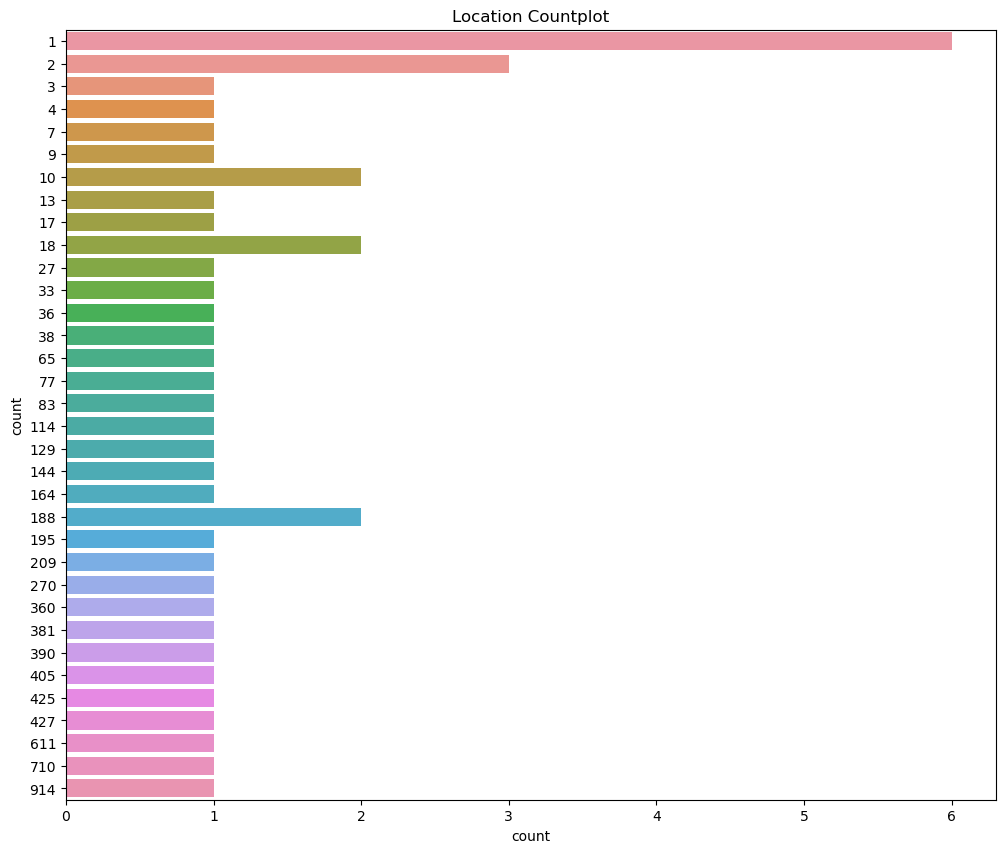

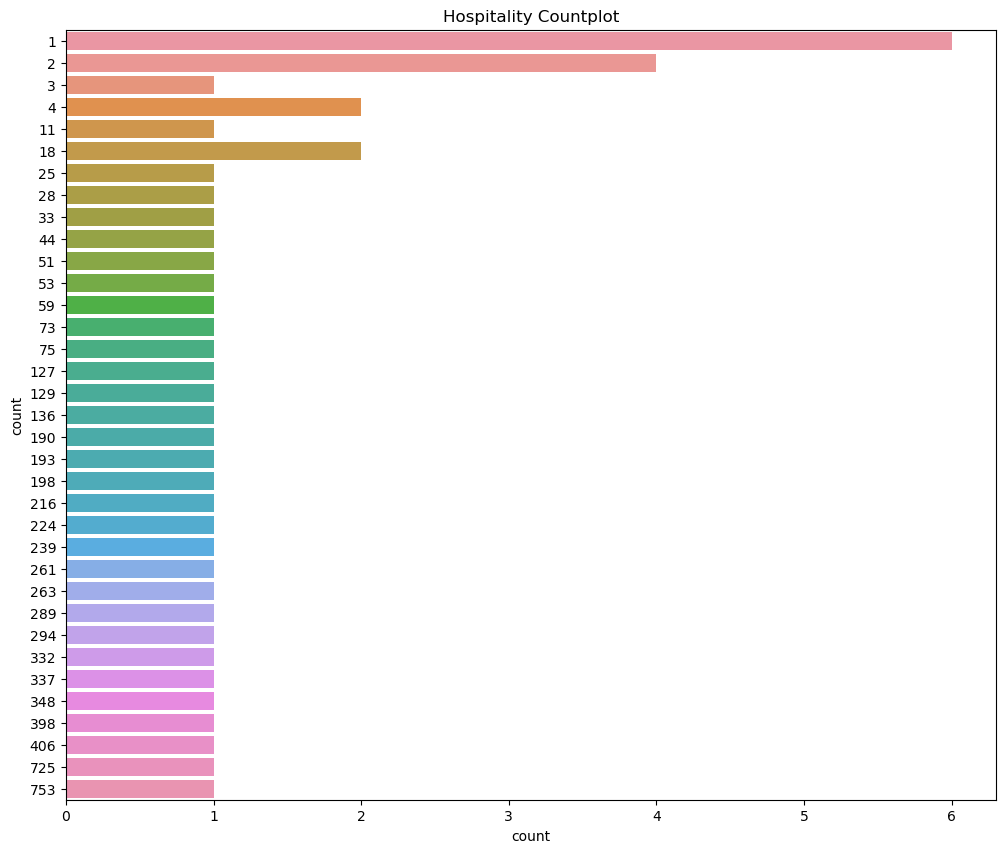

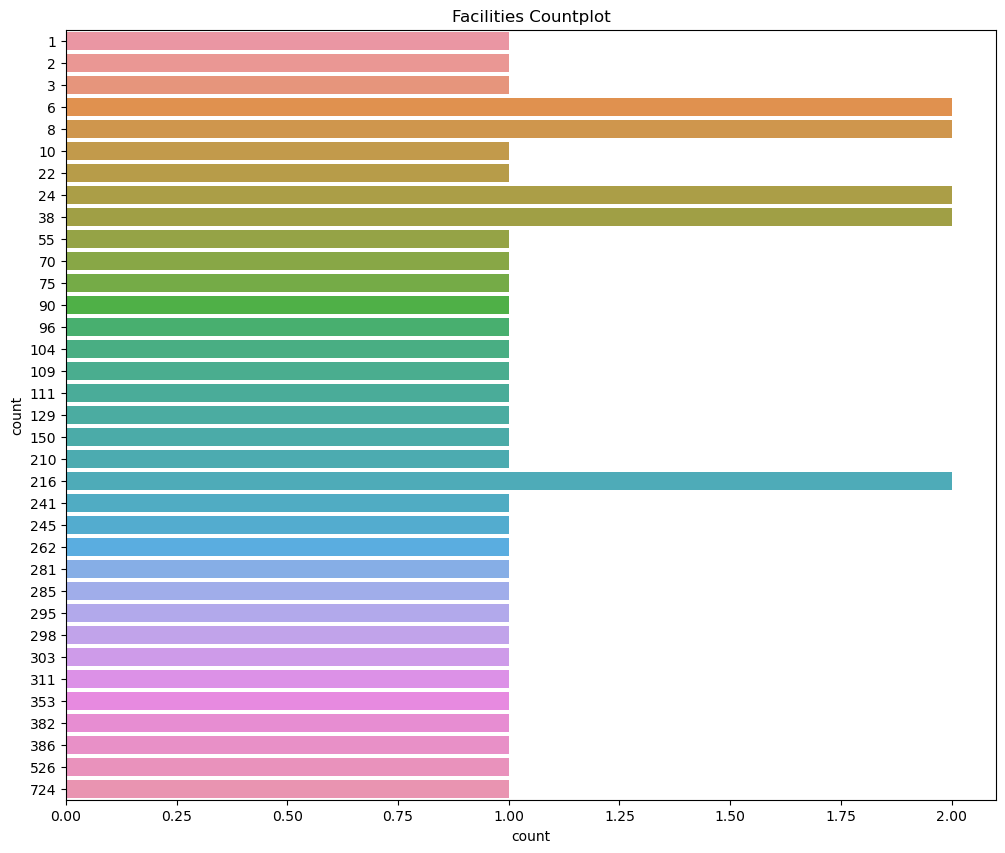

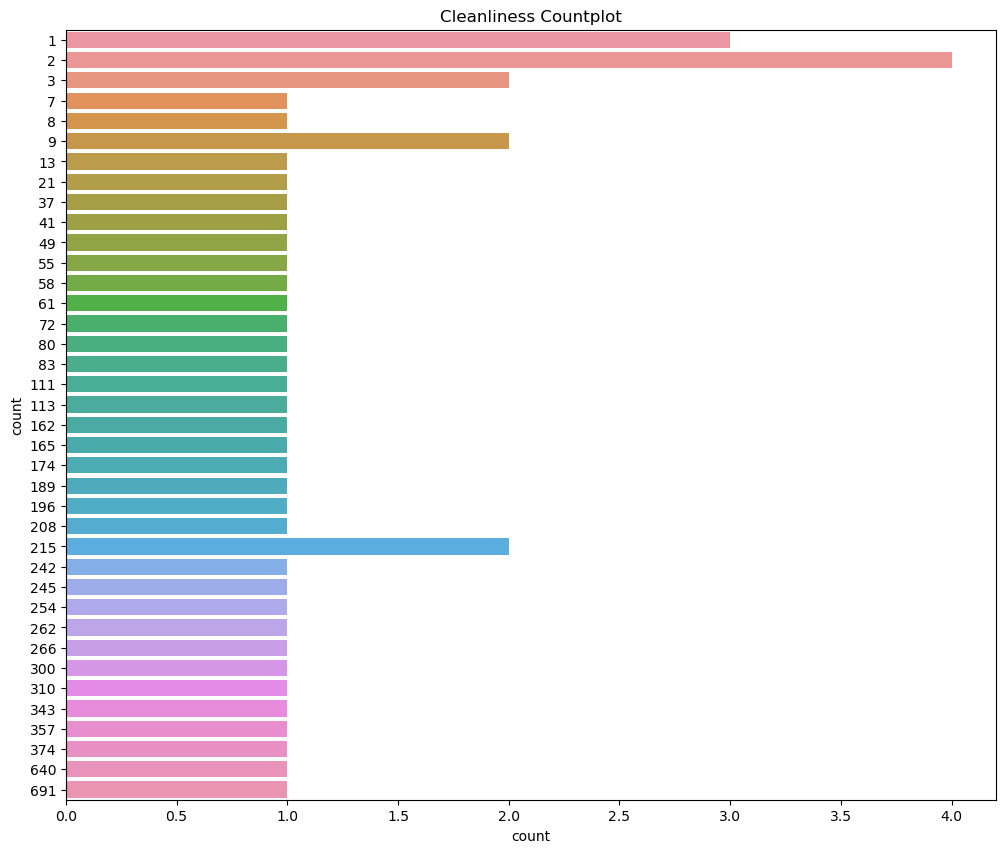

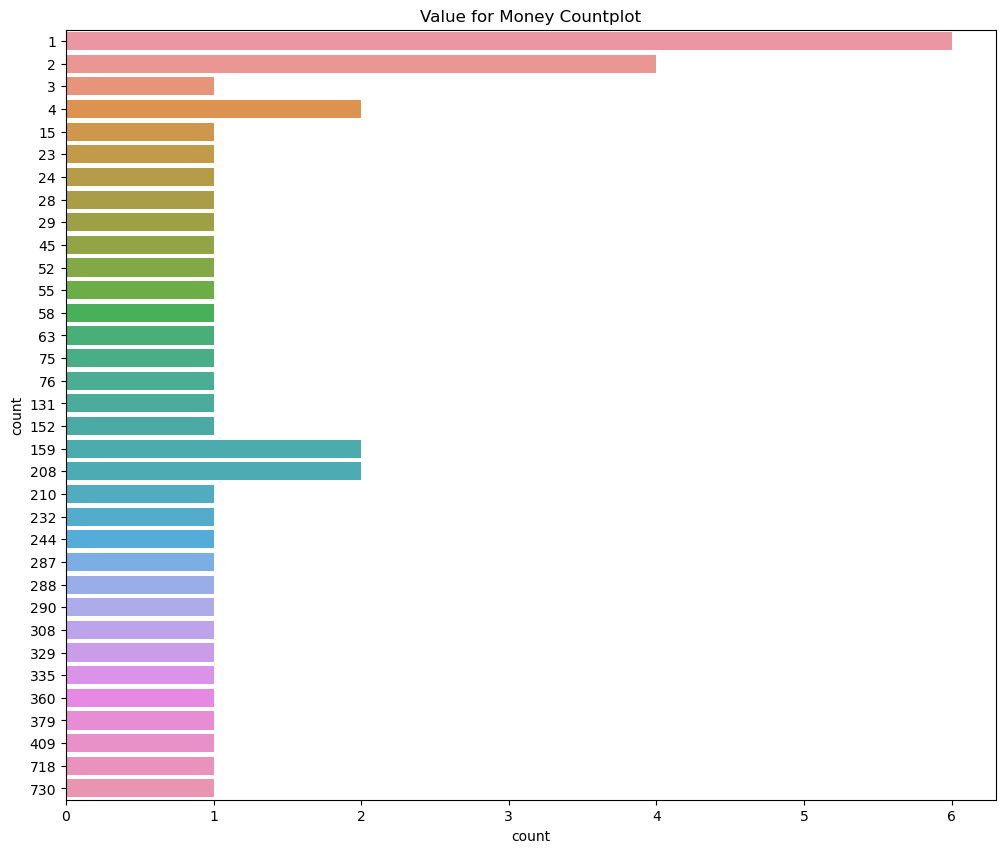

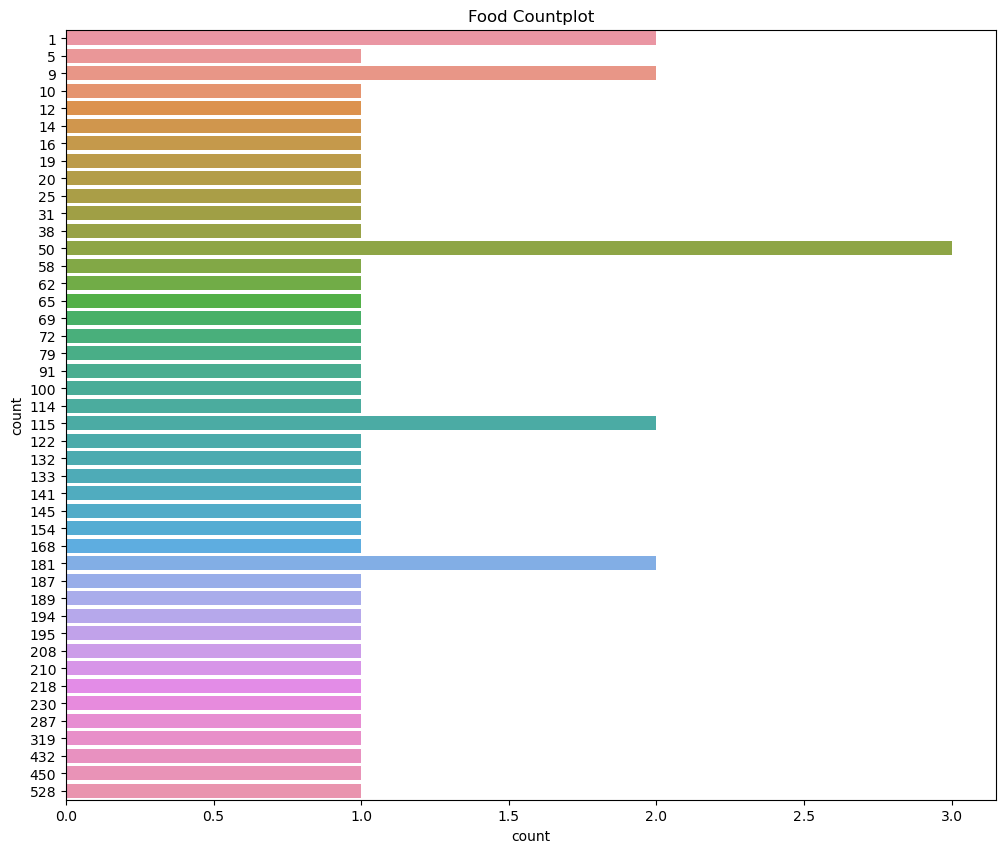

In [48]:
c=["Location","Hospitality","Facilities", "Cleanliness","Value for Money","Food"]
for i, cn in enumerate(data[c]):
    data[cn]=data[cn].astype(float)
    rate = (data[data[cn]!=0][cn].value_counts())
    fig, ax = plt.subplots(figsize=(12,10))
    sns.countplot(y=rate)
    plt.title( cn+" "+'Countplot')
    #plt.savefig('stars.png')
    plt.show()

In [49]:
fig = px.scatter_geo(data, lon=data["longitude"],lat=data["latitude"], scope="asia",

                     color=data["hotel_star_rating"],hover_name="property_name"
                     )
fig.show()

In [50]:
NewDelhiAndNCR= data[data.city == 'NewDelhiAndNCR']
fig =px.scatter_geo(NewDelhiAndNCR, lat="latitude", lon="longitude",
                   size_max=15,color=NewDelhiAndNCR["hotel_star_rating"],hover_name="property_name" )

fig.show()

In [51]:
NewDelhiAndNCR=NewDelhiAndNCR[NewDelhiAndNCR.latitude != 0]
NewDelhiAndNCR

area            city  \
5834                          Gurgaon,Sector 44, Gurgaon  NewDelhiAndNCR   
5835                                          Karol Bagh  NewDelhiAndNCR   
5836   Karol Bagh,New Delhi Railway Station,Central D...  NewDelhiAndNCR   
5837                                         Patel Nagar  NewDelhiAndNCR   
5838     Gurgaon,Sector 56, Gurgaon,Sushant Lok, Gurgaon  NewDelhiAndNCR   
...                                                  ...             ...   
18265                                     NewDelhiAndNCR  NewDelhiAndNCR   
18266                                  Sector 34 , Noida  NewDelhiAndNCR   
18267                                     NewDelhiAndNCR  NewDelhiAndNCR   
18268                       8992, DB Gupta Road, Pahar g  NewDelhiAndNCR   
18269                     Gurgaon,DLF Phase - 2, Gurgaon  NewDelhiAndNCR   

      country hotel_star_rating   latitude  longitude mmt_location_rating  \
5834    Hotel                 1  28.598351  77.231450                   5   
5835    Hotel                 1  28.643946  77.187683                 4.7   
5836    Hotel                 3  28.643195  77.174096                   5   
5837    Hotel                 3  28.643881  77.172533                 3.5   
5838    Hotel                 1  28.420140  77.100595                   4   
...       ...               ...        ...        ...                 ...   
18265   Hotel                 1  28.466140  77.099472                   0   
18266   Hotel                 2  28.585081  77.361564                   0   
18267   Hotel                 1  28.659243  77.435481                   0   
18268   Hotel                 1  28.645619  77.211792                   0   
18269   Hotel                 3  28.492481  77.020660                   0   

       mmt_review_count  mmt_review_score  \
5834                1.0               5.0   
5835                3.0               4.4   
5836                1.0               3.8   
5837                2.0               3.0   
5838                1.0               2.3   
...                 ...               ...   
18265               0.0               2.0   
18266               0.0               0.0   
18267               0.0               0.0   
18268               0.0               0.0   
18269               0.0               0.0   

                         mmt_traveller_type_review_count  \
5834    Families:0|Couples:0|Business:0|Solo:1|Friends:0   
5835    Families:2|Couples:0|Business:0|Solo:0|Friends:0   
5836    Families:0|Couples:0|Business:0|Solo:0|Friends:0   
5837    Families:0|Couples:1|Business:0|Solo:0|Friends:0   
5838    Families:0|Couples:0|Business:0|Solo:0|Friends:0   
...                                                  ...   
18265  Families:{{ratingSummaryInfo.miscMap['family']...   
18266  Families:{{ratingSummaryInfo.miscMap['family']...   
18267  Families:{{ratingSummaryInfo.miscMap['family']...   
18268  Families:{{ratingSummaryInfo.miscMap['family']...   
18269  Families:{{ratingSummaryInfo.miscMap['family']...   

       mmt_tripadvisor_count  \
5834                    52.0   
5835                   111.0   
5836                    27.0   
5837                   189.0   
5838                     5.0   
...                      ...   
18265                   12.0   
18266                    0.0   
18267                    0.0   
18268                    0.0   
18269                    3.0   

                                        property_address  \
5834                     193 Golf Links , 193 Golf Links   
5835   8A/30, W E A Channa Market, Karol Bagh, Metro ...   
5836       9/12, East Patel Nagar , Opp Hotel Siiddharth   
5837    4/3, East Patel Nagar, , Patel Nagar, West Delhi   
5838   Plot No 575 P, opp Sushant Tower, Sushant Lok ...   
...                                                  ...   
18265  18, Arjun Marg, DLF Phase 1, Near Shopping Mal...   
18266                           A 53 , Sector 34 , Noida   
18267  601, Ambedkar Road N

In [52]:
#latitude and longitude values swapped in this row
NewDelhiAndNCR[NewDelhiAndNCR["latitude"]>70]

area            city country hotel_star_rating   latitude  longitude  \
18249  201301  NewDelhiAndNCR   Hotel                 3  77.338195  28.598033   

      mmt_location_rating  mmt_review_count  mmt_review_score  \
18249                   0               0.0               0.0   

                         mmt_traveller_type_review_count  \
18249  Families:{{ratingSummaryInfo.miscMap['family']...   

       mmt_tripadvisor_count property_address         property_id  \
18249                    0.0  N-6 SECTOR-11 ,  201601161336048648   

       property_name property_type room_types site_review_rating  \
18249  Rajdeep villa         Hotel      Hotel                0.0   

      traveller_rating                           uniq_id  Location  \
18249                0  e39c71ac40a8f119855e63459384ee2c       0.0   

       Hospitality  Facilities  Cleanliness  Value for Money  Food  
18249          0.0         0.0          0.0              0.0   0.0

In [53]:
m = NewDelhiAndNCR["latitude"]>70

NewDelhiAndNCR.loc[m, ['latitude', 'longitude']] = (
    NewDelhiAndNCR.loc[m, ['longitude', 'latitude']].values)
NewDelhiAndNCR[NewDelhiAndNCR["uniq_id"]=="e39c71ac40a8f119855e63459384ee2c"]  

area            city country hotel_star_rating   latitude  longitude  \
18249  201301  NewDelhiAndNCR   Hotel                 3  28.598033  77.338195   

      mmt_location_rating  mmt_review_count  mmt_review_score  \
18249                   0               0.0               0.0   

                         mmt_traveller_type_review_count  \
18249  Families:{{ratingSummaryInfo.miscMap['family']...   

       mmt_tripadvisor_count property_address         property_id  \
18249                    0.0  N-6 SECTOR-11 ,  201601161336048648   

       property_name property_type room_types site_review_rating  \
18249  Rajdeep villa         Hotel      Hotel                0.0   

      traveller_rating                           uniq_id  Location  \
18249                0  e39c71ac40a8f119855e63459384ee2c       0.0   

       Hospitality  Facilities  Cleanliness  Value for Money  Food  
18249          0.0         0.0          0.0              0.0   0.0

In [54]:
NewDelhiAndNCR[NewDelhiAndNCR["uniq_id"]=="e39c71ac40a8f119855e63459384ee2c"]

area            city country hotel_star_rating   latitude  longitude  \
18249  201301  NewDelhiAndNCR   Hotel                 3  28.598033  77.338195   

      mmt_location_rating  mmt_review_count  mmt_review_score  \
18249                   0               0.0               0.0   

                         mmt_traveller_type_review_count  \
18249  Families:{{ratingSummaryInfo.miscMap['family']...   

       mmt_tripadvisor_count property_address         property_id  \
18249                    0.0  N-6 SECTOR-11 ,  201601161336048648   

       property_name property_type room_types site_review_rating  \
18249  Rajdeep villa         Hotel      Hotel                0.0   

      traveller_rating                           uniq_id  Location  \
18249                0  e39c71ac40a8f119855e63459384ee2c       0.0   

       Hospitality  Facilities  Cleanliness  Value for Money  Food  
18249          0.0         0.0          0.0              0.0   0.0

In [55]:

fig =px.scatter_geo(NewDelhiAndNCR, lat="latitude", lon="longitude",
                   size_max=15,color=NewDelhiAndNCR["hotel_star_rating"],hover_name="property_name" )

fig.show()

In [56]:
import geopandas as gpd

In [57]:
gdf = gpd.GeoDataFrame(
    NewDelhiAndNCR, geometry=gpd.points_from_xy(x=NewDelhiAndNCR.longitude, y=NewDelhiAndNCR.latitude)
)
gdf

area            city  \
5834                          Gurgaon,Sector 44, Gurgaon  NewDelhiAndNCR   
5835                                          Karol Bagh  NewDelhiAndNCR   
5836   Karol Bagh,New Delhi Railway Station,Central D...  NewDelhiAndNCR   
5837                                         Patel Nagar  NewDelhiAndNCR   
5838     Gurgaon,Sector 56, Gurgaon,Sushant Lok, Gurgaon  NewDelhiAndNCR   
...                                                  ...             ...   
18265                                     NewDelhiAndNCR  NewDelhiAndNCR   
18266                                  Sector 34 , Noida  NewDelhiAndNCR   
18267                                     NewDelhiAndNCR  NewDelhiAndNCR   
18268                       8992, DB Gupta Road, Pahar g  NewDelhiAndNCR   
18269                     Gurgaon,DLF Phase - 2, Gurgaon  NewDelhiAndNCR   

      country hotel_star_rating   latitude  longitude mmt_location_rating  \
5834    Hotel                 1  28.598351  77.231450                   5   
5835    Hotel                 1  28.643946  77.187683                 4.7   
5836    Hotel                 3  28.643195  77.174096                   5   
5837    Hotel                 3  28.643881  77.172533                 3.5   
5838    Hotel                 1  28.420140  77.100595                   4   
...       ...               ...        ...        ...                 ...   
18265   Hotel                 1  28.466140  77.099472                   0   
18266   Hotel                 2  28.585081  77.361564                   0   
18267   Hotel                 1  28.659243  77.435481                   0   
18268   Hotel                 1  28.645619  77.211792                   0   
18269   Hotel                 3  28.492481  77.020660                   0   

       mmt_review_count  mmt_review_score  \
5834                1.0               5.0   
5835                3.0               4.4   
5836                1.0               3.8   
5837                2.0               3.0   
5838                1.0               2.3   
...                 ...               ...   
18265               0.0               2.0   
18266               0.0               0.0   
18267               0.0               0.0   
18268               0.0               0.0   
18269               0.0               0.0   

                         mmt_traveller_type_review_count  \
5834    Families:0|Couples:0|Business:0|Solo:1|Friends:0   
5835    Families:2|Couples:0|Business:0|Solo:0|Friends:0   
5836    Families:0|Couples:0|Business:0|Solo:0|Friends:0   
5837    Families:0|Couples:1|Business:0|Solo:0|Friends:0   
5838    Families:0|Couples:0|Business:0|Solo:0|Friends:0   
...                                                  ...   
18265  Families:{{ratingSummaryInfo.miscMap['family']...   
18266  Families:{{ratingSummaryInfo.miscMap['family']...   
18267  Families:{{ratingSummaryInfo.miscMap['family']...   
18268  Families:{{ratingSummaryInfo.miscMap['family']...   
18269  Families:{{ratingSummaryInfo.miscMap['family']...   

       mmt_tripadvisor_count  \
5834                    52.0   
5835                   111.0   
5836                    27.0   
5837                   189.0   
5838                     5.0   
...                      ...   
18265                   12.0   
18266                    0.0   
18267                    0.0   
18268                    0.0   
18269                    3.0   

                                        property_address  \
5834                     193 Golf Links , 193 Golf Links   
5835   8A/30, W E A Channa Market, Karol Bagh, Metro ...   
5836       9/12, East Patel Nagar , Opp Hotel Siiddharth   
5837    4/3, East Patel Nagar, , Patel Nagar, West Delhi   
5838   Plot No 575 P, opp Sushant Tower, Sushant Lok ...   
...                                                  ...   
18265  18, Arjun Marg, DLF Phase 1, Near Shopping Mal...   
18266                           A 53 , Sector 34 , Noida   
18267  601, Ambedkar Road N

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

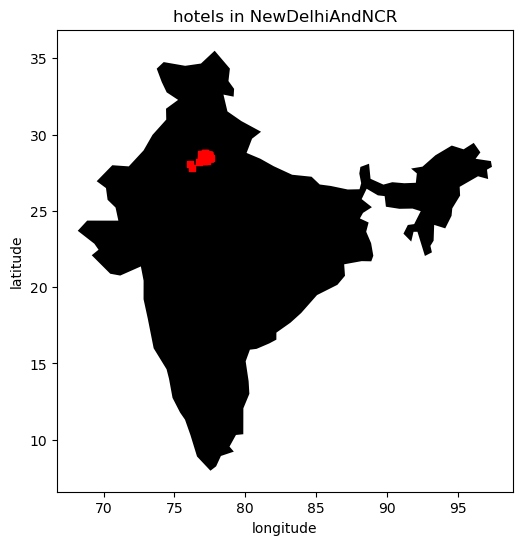

In [58]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "India"].plot(color="black",ax=ax)
NewDelhiAndNCR.plot(x="longitude", y="latitude", kind="scatter", 
        c="red", marker="s", 
        title=f"hotels in NewDelhiAndNCR", 
        ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)

plt.show()

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [60]:
NewDelhiAndNCR=NewDelhiAndNCR.dropna()

In [61]:

# Elbow method to determine the number of K in Kmeans Clustering
coords = NewDelhiAndNCR[['longitude','latitude']]

#The variable distortions will store the sum of squared distances from each point 
#to its assigned center (inertia) for different values of K. 
#The range of potential values for K is set from 1 to 24.
distortions = []
K = range(1,25)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)

#The Elbow of the curve represents the point where adding more clusters does not 
#significantly reduce the inertia, indicating an optimal number of clusters.

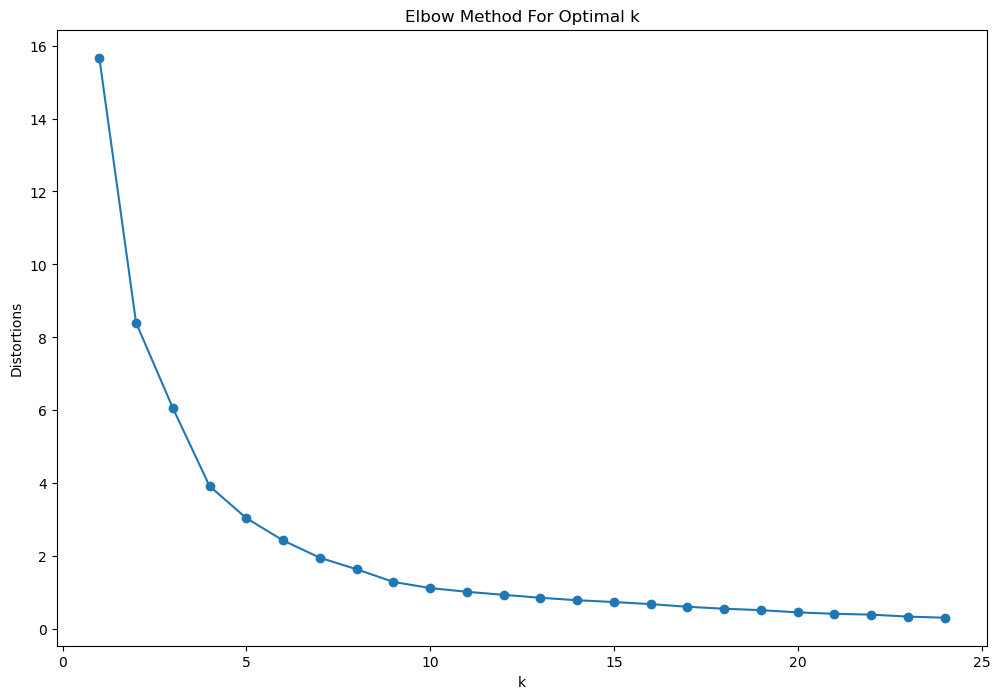

In [62]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.savefig('elbow.png')
plt.show()
     

In [63]:

from sklearn.metrics import silhouette_score

sil = []
kmax = 50

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(coords)
    labels = kmeans.labels_
    sil.append(silhouette_score(coords, labels, metric = 'euclidean'))

In [64]:

for i in [2,3,4,5,6]:
    '''
    Create KMeans instance for different number of clusters
    '''
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(coords)
    
    y = kmeans.labels_
    print(f"k ={i} silhouette_score ", silhouette_score(coords, y, metric='euclidean'))
#The silhouette score provides a quantitative measure of how well-separated the clusters are.
#a higher silhouette score generally suggests a better-defined clustering.
#A score around 1 indicates that the object is far away from the neighboring clusters.
#A score around 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.
#A score around -1 indicates that those clusters may have been assigned incorrectly.

k =2 silhouette_score  0.5219744570412115
k =3 silhouette_score  0.5204784025695056
k =4 silhouette_score  0.5389262846458632
k =5 silhouette_score  0.5284403094918242
k =6 silhouette_score  0.5442307677286796


In [65]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
print("k = 5", " silhouette_score ", silhouette_score(coords, y, metric='euclidean'))
     

k = 5  silhouette_score  0.536914360334202


In [66]:

NewDelhiAndNCR['cluster'] = kmeans.predict(NewDelhiAndNCR[['longitude','latitude']])
i=np.arange(0,(len(NewDelhiAndNCR["uniq_id"])))
NewDelhiAndNCR.set_index(i,inplace=True)
NewDelhiAndNCR.head()

area            city country  \
0                         Gurgaon,Sector 44, Gurgaon  NewDelhiAndNCR   Hotel   
1                                         Karol Bagh  NewDelhiAndNCR   Hotel   
2  Karol Bagh,New Delhi Railway Station,Central D...  NewDelhiAndNCR   Hotel   
3                                        Patel Nagar  NewDelhiAndNCR   Hotel   
4    Gurgaon,Sector 56, Gurgaon,Sushant Lok, Gurgaon  NewDelhiAndNCR   Hotel   

  hotel_star_rating   latitude  longitude mmt_location_rating  \
0                 1  28.598351  77.231450                   5   
1                 1  28.643946  77.187683                 4.7   
2                 3  28.643195  77.174096                   5   
3                 3  28.643881  77.172533                 3.5   
4                 1  28.420140  77.100595                   4   

   mmt_review_count  mmt_review_score  \
0               1.0               5.0   
1               3.0               4.4   
2               1.0               3.8   
3               2.0               3.0   
4               1.0               2.3   

                    mmt_traveller_type_review_count  mmt_tripadvisor_count  \
0  Families:0|Couples:0|Business:0|Solo:1|Friends:0                   52.0   
1  Families:2|Couples:0|Business:0|Solo:0|Friends:0                  111.0   
2  Families:0|Couples:0|Business:0|Solo:0|Friends:0                   27.0   
3  Families:0|Couples:1|Business:0|Solo:0|Friends:0                  189.0   
4  Families:0|Couples:0|Business:0|Solo:0|Friends:0                    5.0   

                                    property_address            property_id  \
0                    193 Golf Links , 193 Golf Links  201202161432306297&i=   
1  8A/30, W E A Channa Market, Karol Bagh, Metro ...  201209081513146505&i=   
2      9/12, East Patel Nagar , Opp Hotel Siiddharth  201205151250266712&i=   
3   4/3, East Patel Nagar, , Patel Nagar, West Delhi  201102152029134464&i=   
4  Plot No 575 P, opp Sushant Tower, Sushant Lok ...  201412081344554396&i=   

                property_name property_type room_types site_review_rating  \
0  Ahuja Residency Golf Links         Hotel      Hotel                0.0   
1          Hotel Singh Palace         Hotel      Hotel                0.0   
2              Hotel Kingston         Hotel      Hotel                0.0   
3               Hotel Almondz         Hotel      Hotel                0.0   
4              Redbrick Villa         Hotel      Hotel                0.0   

                                    traveller_rating  \
0  Location:5/5 | Hospitality:5/5 | Facilities:5/...   
1  Location:4.7/5 | Hospitality:5/5 | Facilities:...   
2  Location:5/5 | Hospitality:4/5 | Facilities:3/...   
3  Location:3.5/5 | Hospitality:5/5 | Facilities:...   
4  Location:4/5 | Hospitality:2/5 | Facilities:2/...   

                            uniq_id  Location  Hospitality  Facilities  \
0  693358e6d8740fa7b181297b76b25b5b       5.0          5.0         5.0   
1  85d0e537f2e3bfa4b2c479eddd354f13       4.7          5.0         4.0   
2  010ac45f200a414359d95195b51913fd       5.0          4.0         3.0   
3  d05fe471ee3247c11ccb0a2d39106930       3.5          5.0         2.5   
4  62d85c189ea05145e3d04d993aef57f7       4.0          2.0         2.0   

   Cleanliness  Value for Money  Food  cluster  
0          5.0              5.0   5.0        2  
1          4.7              4.7   4.5        2  
2          3.0              4.0   4.0        2  
3          4.0              3.0   3.0        2  
4          2.0              2.0   2.0        3

In [67]:
NewDelhiAndNCR['cluster'].value_counts()

cluster
2    254
3    229
1    140
0     76
4      2
Name: count, dtype: int64

In [68]:
px.scatter_geo(NewDelhiAndNCR, lat="latitude", lon="longitude",color=NewDelhiAndNCR["cluster"])
                

In [69]:
import folium
from branca.element import Figure

geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in gdf['geometry']]

#Folium makes it simple to visualize data that has geographical components such as points
#on a map, choropleth maps, and more.

In [70]:
#giving the list of longitudes and latitudes from the column geometry in NewDelhiAndNCR
geo_df_list

[[28.598351, 77.23145],
 [28.643946, 77.187683],
 [28.643195, 77.174096],
 [28.643881, 77.172533],
 [28.42014, 77.100595],
 [28.629438, 77.12175],
 [28.663829, 77.321179],
 [28.645555, 77.192893],
 [28.52863, 77.272515],
 [28.646807, 77.187895],
 [28.641078, 77.213416],
 [28.443492, 77.034493],
 [28.489848, 77.283002],
 [28.564727, 77.196064],
 [28.6506, 77.194431],
 [28.651163, 77.234128],
 [28.480555, 77.086805],
 [28.667123, 77.093256],
 [28.557332, 77.206421],
 [28.464945, 77.064613],
 [28.629877, 77.314643],
 [28.538393, 77.151643],
 [28.462165, 77.067695],
 [28.648338, 77.208878],
 [28.449846, 77.527986],
 [28.563613, 77.265331],
 [28.486186, 77.093248],
 [28.482475, 77.086113],
 [28.643339, 77.216641],
 [28.647224, 77.188713],
 [28.467022, 77.095708],
 [28.632599, 77.222748],
 [28.646155, 77.173433],
 [28.648817, 77.193451],
 [28.474706, 77.042753],
 [28.476077, 77.480705],
 [28.556311, 77.247542],
 [28.65071, 77.186857],
 [28.480159, 77.066917],
 [28.64614, 77.192367],
 [28.623

In [71]:
fig=Figure(width=550,height=350)
m3=folium.Map(location=[28.644800, 77.216721],tiles='cartodbpositron',zoom_start=11,min_zoom=8,max_zoom=14)

In [72]:
i=0
for coordinates in geo_df_list:

    if NewDelhiAndNCR["cluster"][i] == 0:
        type_color = "green"
    elif NewDelhiAndNCR["cluster"][i] == 1:
        type_color = "blue"
    elif NewDelhiAndNCR["cluster"][i] == 2:
        type_color = "orange"
    elif NewDelhiAndNCR["cluster"][i] == 3:
        type_color = "pink"
    else:
        type_color = "purple"
    m3.add_child(
        folium.Marker(
            location=coordinates,popup=NewDelhiAndNCR["property_name"][i],icon=folium.Icon(color="%s" % type_color),))
    i = i + 1



m3




In [73]:
m3.save("Newdelhi.png")

In [74]:
NewDelhiAndNCR.columns

Index(['area', 'city', 'country', 'hotel_star_rating', 'latitude', 'longitude',
       'mmt_location_rating', 'mmt_review_count', 'mmt_review_score',
       'mmt_traveller_type_review_count', 'mmt_tripadvisor_count',
       'property_address', 'property_id', 'property_name', 'property_type',
       'room_types', 'site_review_rating', 'traveller_rating', 'uniq_id',
       'Location', 'Hospitality', 'Facilities', 'Cleanliness',
       'Value for Money', 'Food', 'cluster'],
      dtype='object')

In [75]:
top_restaurants_Newdelhi = NewDelhiAndNCR.sort_values(by=['mmt_review_count', 'hotel_star_rating'], ascending=False)
top_restaurants_Newdelhi.head()
     

area            city  \
461                New Delhi Railway Station,Paharganj  NewDelhiAndNCR   
360                               Dwarka,Delhi Airport  NewDelhiAndNCR   
425          Ghaziabad,East Delhi,Kaushambi, Ghaziabad  NewDelhiAndNCR   
66   Mahipalpur,Kapashera,Delhi Airport,Aerocity Ho...  NewDelhiAndNCR   
83                  Mahipalpur,Kapashera,Delhi Airport  NewDelhiAndNCR   

    country hotel_star_rating   latitude  longitude mmt_location_rating  \
461   Hotel                 3  28.645659  77.216745                 3.9   
360   Hotel                 5  28.596411  77.036326                   4   
425   Hotel                 4  28.644432  77.335170                 4.1   
66    Hotel                 3  28.550826  77.129715                 4.2   
83    Hotel                 4  28.552000  77.120900                 4.6   

     mmt_review_count  mmt_review_score  \
461             417.0               3.8   
360             387.0               4.1   
425             204.0               4.1   
66              192.0               3.3   
83              130.0               4.1   

                       mmt_traveller_type_review_count  mmt_tripadvisor_count  \
461  Families:88|Couples:51|Business:34|Solo:27|Fri...                 1496.0   
360  Families:105|Couples:83|Business:87|Solo:57|Fr...                 1080.0   
425  Families:45|Couples:55|Business:33|Solo:23|Fri...                  249.0   
66   Families:17|Couples:13|Business:2|Solo:6|Frien...                  121.0   
83   Families:30|Couples:30|Business:22|Solo:12|Fri...                  593.0   

                                      property_address            property_id  \
461  36, Arakashan Road, Pahar Ganj , Pahar Ganj, N...  200701121640393527&i=   
360  Plot No.-4, Dwarka Sector-13 , Dwarka City cen...  201201151306089659&i=   
425  Mahagun Metro Mall, VC 3, Sector 3, Vaishali, ...  201012311433468016&i=   
66   A-292 Mahipalpur Ext NH-8 Near Airport , Mahip...  200809161804535113&i=   
83   Hospitality District, Delhi International Airp...  201203301842173153&i=   

                         property_name property_type room_types  \
461                       Hotel Ajanta         Hotel      Hotel   
360          Radisson Blu Hotel Dwarka         Hotel      Hotel   
425     Mahagun Sarovar Portico Suites         Hotel      Hotel   
66                        Hotel Lohmod         Hotel      Hotel   
83   Lemon Tree Premier, Delhi Airport         Hotel      Hotel   

    site_review_rating                                   traveller_rating  \
461                0.0  Location:3.9/5 | Hospitality:3.9/5 | Facilitie...   
360                0.0  Location:4/5 | Hospitality:4/5 | Facilities:4....   
425                0.0  Location:4.1/5 | Hospitality:4/5 | Facilities:...   
66                 0.0  Location:4.2/5 | Hospitality:3.7/5 | Facilitie...   
83                 0.0  Location:4.6/5 | Hospitality:4/5 | Facilities:...   

                              uniq_id  Location  Hospitality  Facilities  \
461  5597c84e5e06c238973c2a6c152b46ae       3.9          3.9         3.8   
360  e04025deb424c1c053a78bb50fbf34b6       4.0          4.0         4.1   
425  b4ccd0d6fc6700e96cfe273169dbf0f5       4.1          4.0         4.2   
66   c55f96426e6f6f7f8faba6d9e4ed2345       4.2          3.7         3.1   
83   b7a4f9f4bba725ead987a8b44f811bbe       4.6          4.0         4.1   

     Cleanliness  Value for Money  Food  cluster  
461          3.9              3.8   3.7        2  
360          4.3              4.0   3.9        3  
425          4.3              4.1   3.6        0  
66           3.1              3.2   3.4        3  
83           4.3              4.0   3.8        3

In [76]:
def recommend_restaurants(df, longitude, latitude):
    # Predict the cluster for longitude and latitude provided
    cluster = kmeans.predict(np.array([longitude,latitude]).reshape(1,-1))[0]
    print(cluster)
   
    # Get the best restaurant in this cluster
    return  df[df['cluster']==cluster].iloc[0:5][['property_name', 'latitude','longitude']]
   
     

In [77]:
#checking function
recommend_restaurants(top_restaurants_Newdelhi,77.1200,28.55200  )

3


property_name   latitude  longitude
360          Radisson Blu Hotel Dwarka  28.596411  77.036326
66                        Hotel Lohmod  28.550826  77.129715
83   Lemon Tree Premier, Delhi Airport  28.552000  77.120900
415       Red Fox Hotel, Delhi Airport  28.551823  77.120804
82              Ramada Gurgaon Central  28.449897  77.071131

In [78]:
latitude=float(input ("Enter latitude: "))
longitude=float(input ("Enter longitude: "))
Hotel=recommend_restaurants(top_restaurants_Newdelhi,longitude, latitude)
i=np.arange(0,5)
Hotel.set_index(i,inplace=True)

Hotel

Enter latitude: 28.123
Enter longitude: 76.889
3


property_name   latitude  longitude
0          Radisson Blu Hotel Dwarka  28.596411  77.036326
1                       Hotel Lohmod  28.550826  77.129715
2  Lemon Tree Premier, Delhi Airport  28.552000  77.120900
3       Red Fox Hotel, Delhi Airport  28.551823  77.120804
4             Ramada Gurgaon Central  28.449897  77.071131

In [79]:
Hotel_data=Hotel.copy()


In [80]:
Hotel_data=Hotel_data.drop(["property_name"],axis=1)
Hotel_data

latitude  longitude
0  28.596411  77.036326
1  28.550826  77.129715
2  28.552000  77.120900
3  28.551823  77.120804
4  28.449897  77.071131

In [81]:
dataList = [] #empty list
for index, row in Hotel_data.iterrows(): 
    mylist = [row.latitude, row.longitude]
    dataList.append(mylist)

In [82]:
dataList

[[28.596411, 77.036326],
 [28.550826, 77.129715],
 [28.552, 77.1209],
 [28.551823, 77.120804],
 [28.449897, 77.071131]]

In [83]:
px.scatter_geo(Hotel, lat="latitude", lon="longitude",hover_name=Hotel["property_name"],scope="asia")

In [84]:
m1=folium.Map(location=[28.644800, 77.216721],tiles='cartodbpositron',zoom_start=11,min_zoom=8,max_zoom=14)
i=0
for coordinates in dataList:
  
    m1.add_child(
        folium.Marker(
            location=dataList[i],popup=Hotel["property_name"][i],icon=folium.Icon(color="Pink")))
    i = i + 1



m1